In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras


from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [106]:
df=pd.read_csv('diabetes.csv')
print("Shape",df.shape)
df.head()

Shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [109]:
df.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [110]:
#seperating the data and labels
X = df.drop(columns ='Outcome',axis=1)
Y= df['Outcome']

In [111]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [112]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


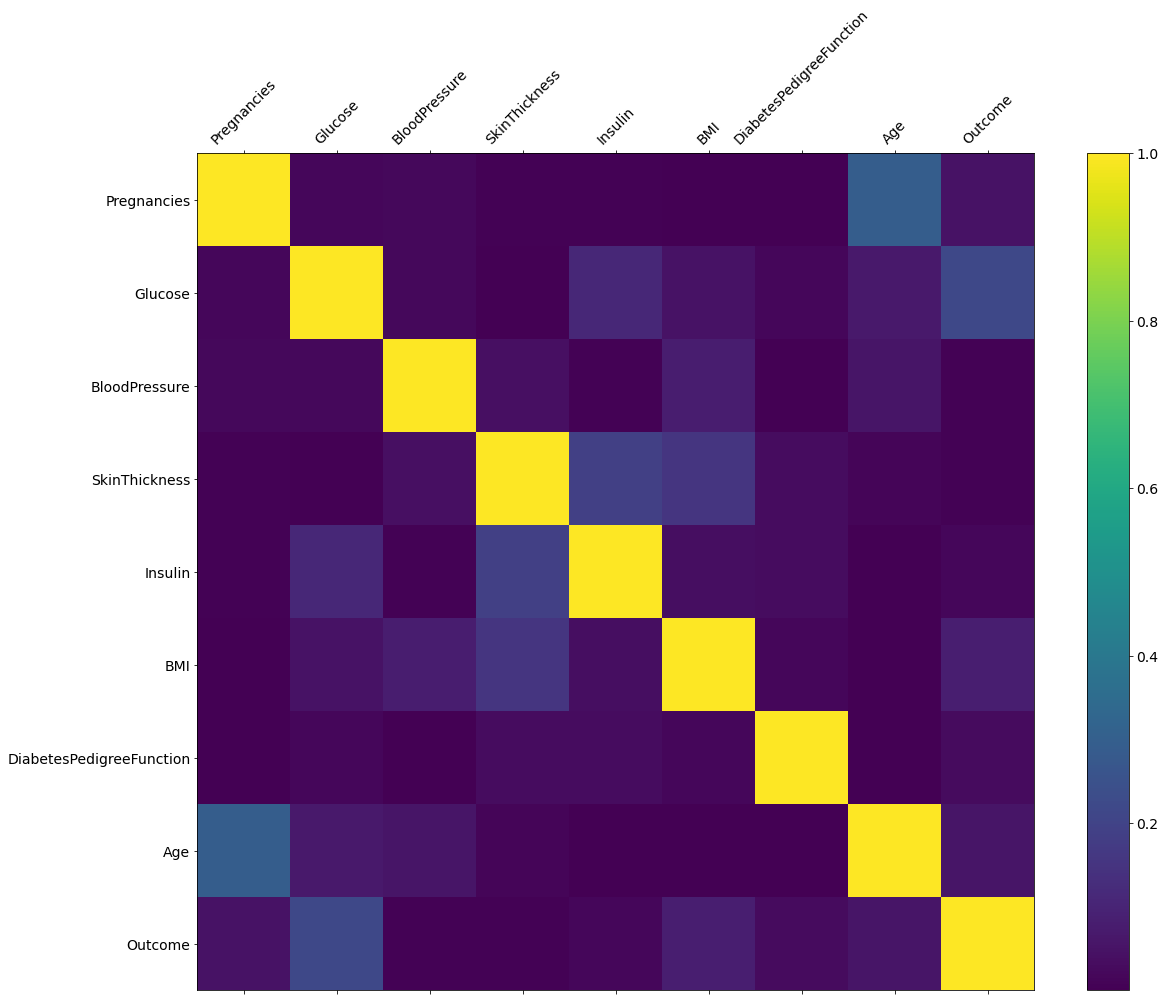

In [115]:
fig = plt.figure(figsize = (19,15))
plt.matshow(df.corr()**2,fignum = fig.number)
plt.xticks(range(df.shape[1]),df.columns,fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]),df.columns,fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)

In [116]:
print(df["Outcome"].value_counts())
fig = plt.figure(figsize = (10, 6))

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Diabetes Outcome')

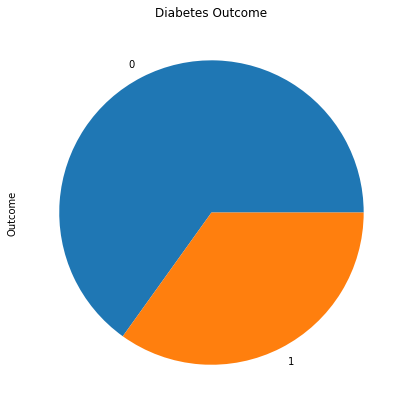

In [117]:
fig = plt.figure(figsize = (20,7))
df["Outcome"].value_counts().plot(kind="pie").set_title("Diabetes Outcome")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

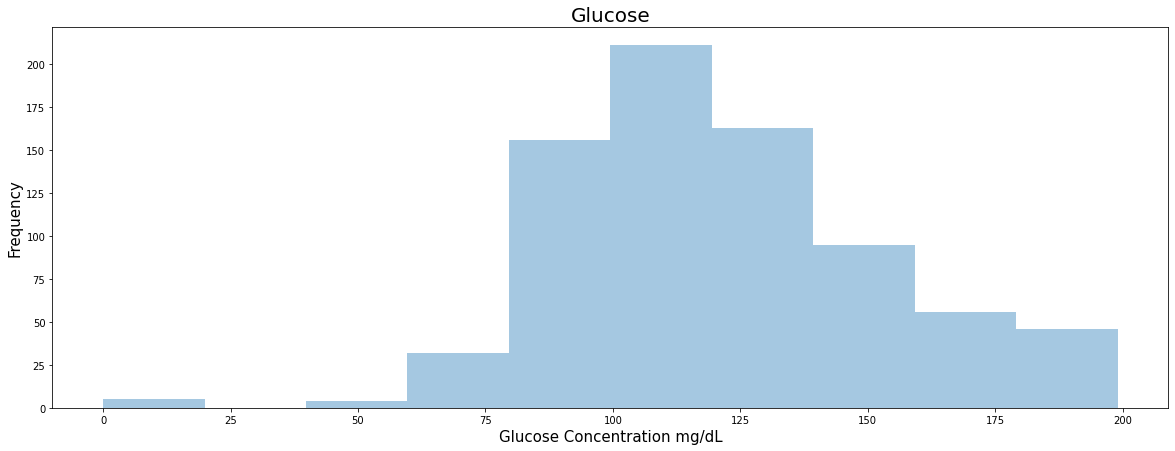

In [118]:

fig = plt.figure(figsize = (20,7))
#plt.hist(df["Glucose"], bins=9)
sns.distplot(df["Glucose"],kde=False ,bins=10)
#plt.ylim(0,210 )
plt.xticks()
plt.xlabel("Glucose Concentration mg/dL",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Glucose",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose for Positive')

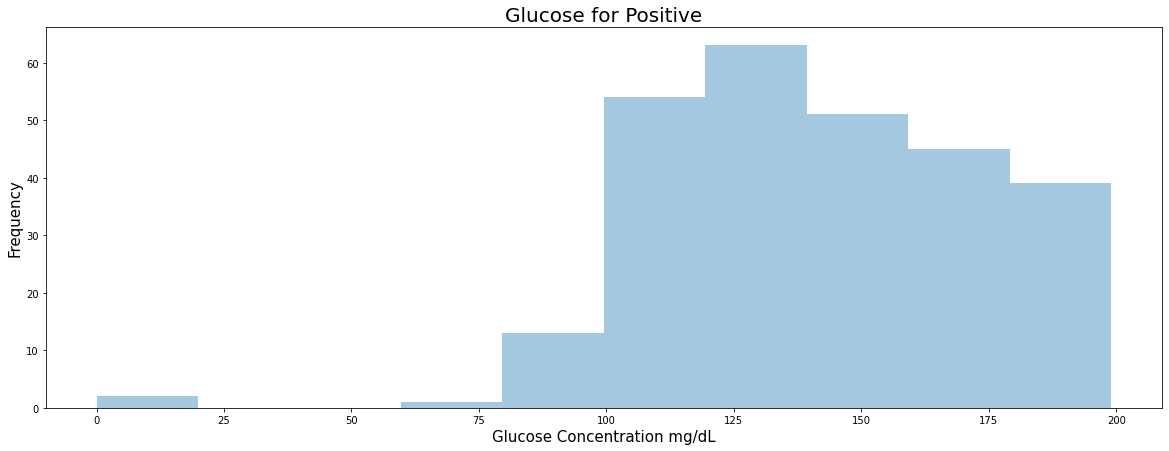

In [119]:
fig = plt.figure(figsize = (20,7))

sns.distplot(df["Glucose"][df["Outcome"] == 1],kde=False ,bins=10)
plt.xticks()
plt.xlabel("Glucose Concentration mg/dL",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Glucose for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose for Negative')

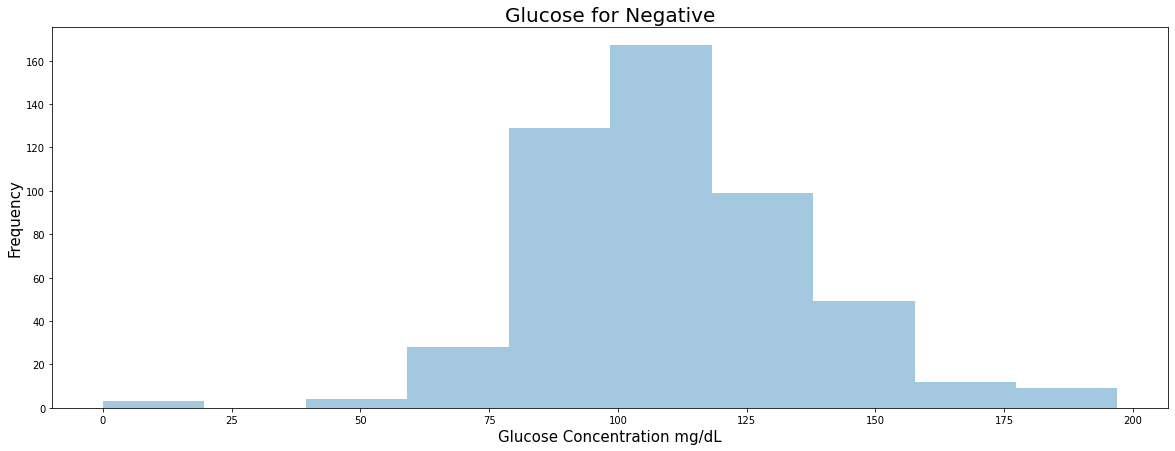

In [120]:
fig = plt.figure(figsize = (20,7))

sns.distplot(df["Glucose"][df["Outcome"] == 0],kde=False ,bins=10)
plt.xticks()
plt.xlabel("Glucose Concentration mg/dL",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Glucose for Negative",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pregnancies for Positive')

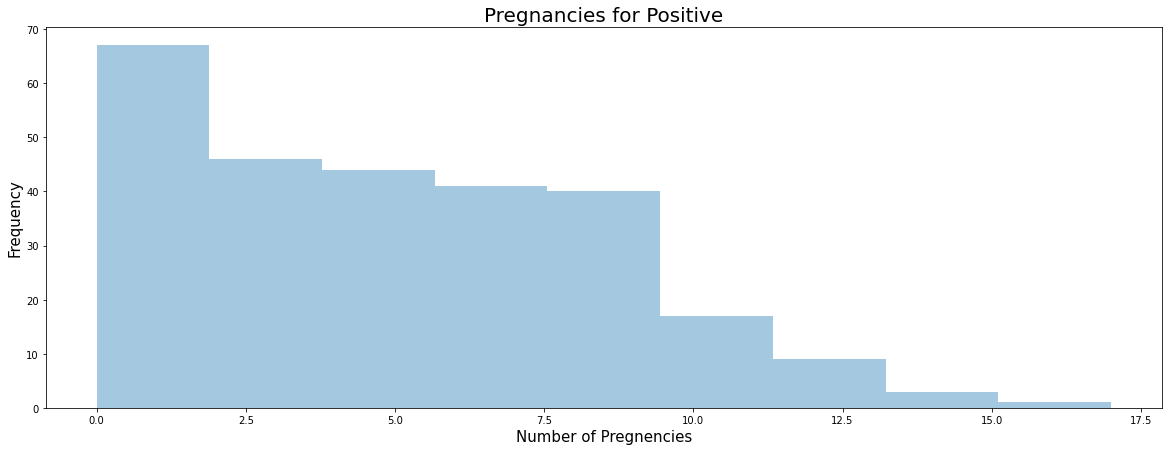

In [121]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["Pregnancies"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Number of Pregnencies",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Pregnancies for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BloodPressure for Positive')

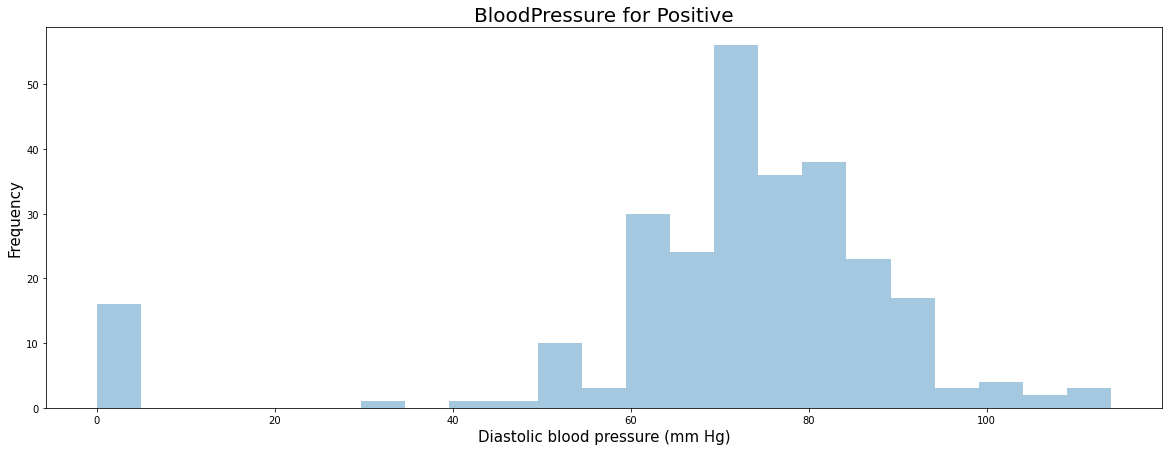

In [122]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["BloodPressure"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Diastolic blood pressure (mm Hg)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("BloodPressure for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SkinThickness for Positive')

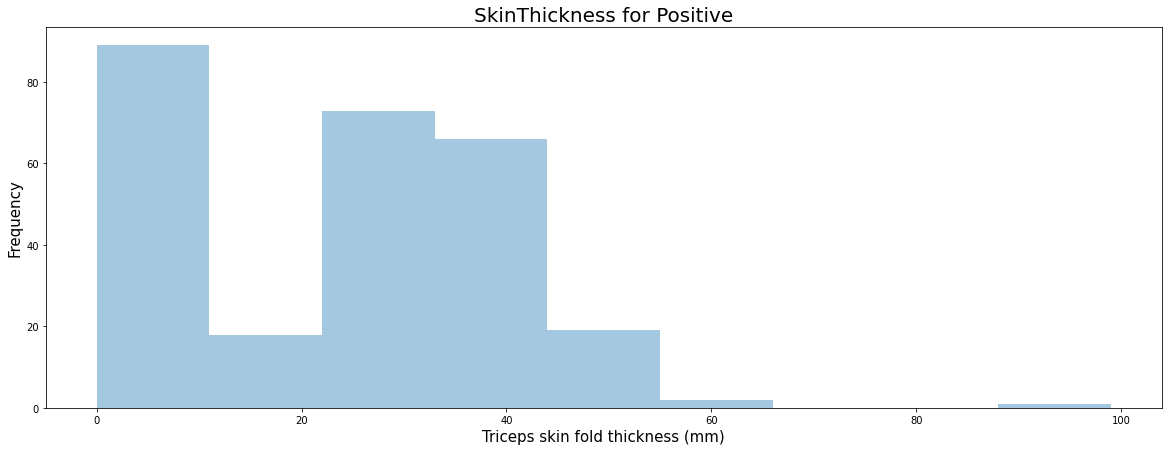

In [123]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["SkinThickness"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Triceps skin fold thickness (mm)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("SkinThickness for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin for Positive')

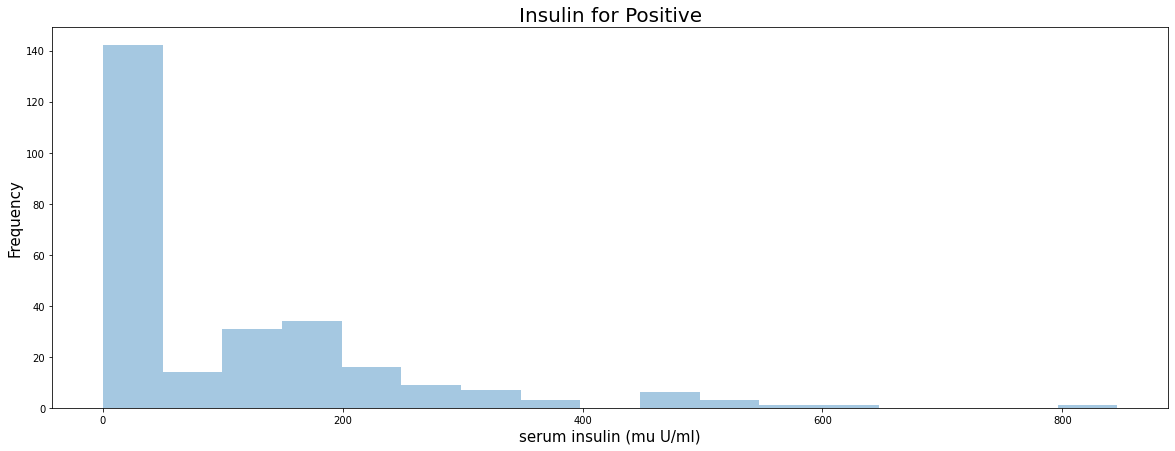

In [124]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["Insulin"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("serum insulin (mu U/ml)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Insulin for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI for Positive')

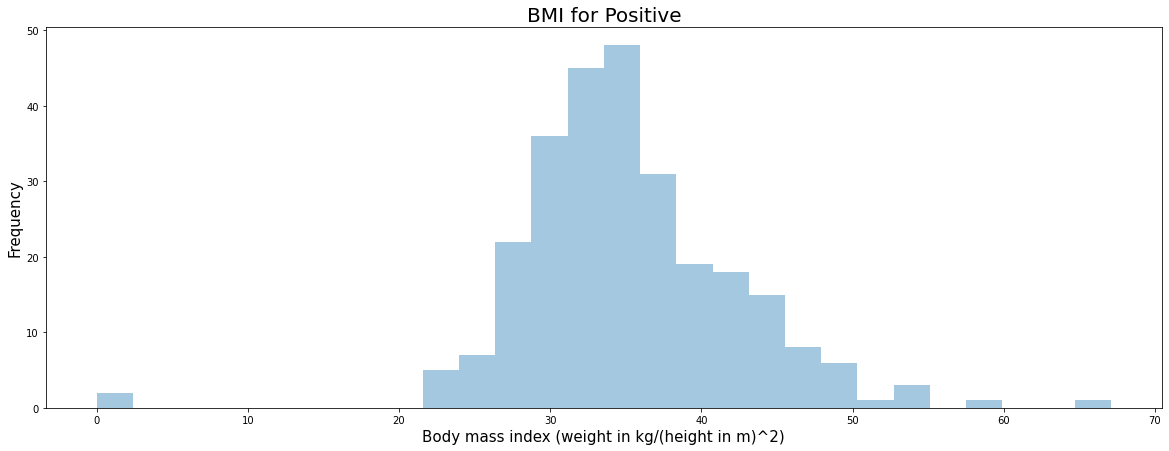

In [125]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["BMI"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Body mass index (weight in kg/(height in m)^2)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("BMI for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DiabetesPedigreeFunction for Positive')

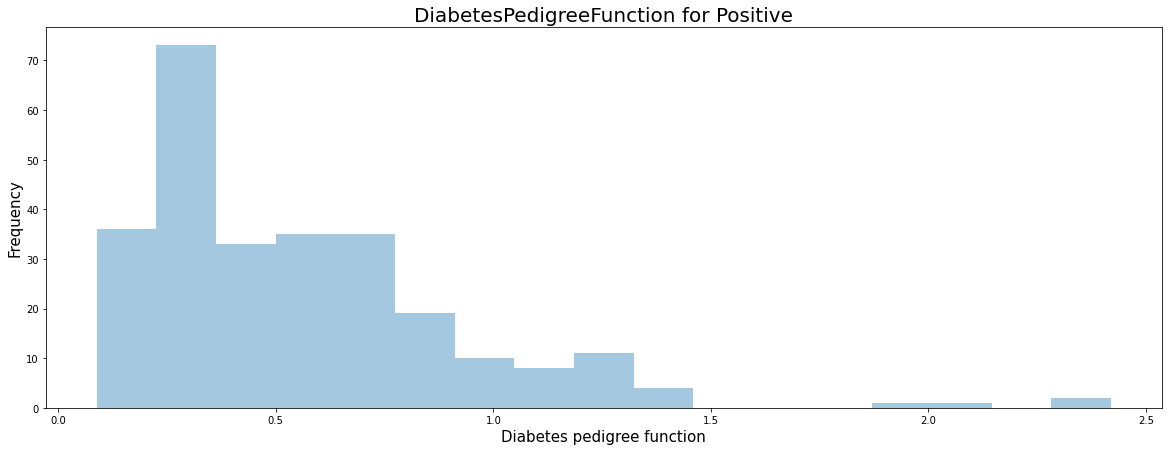

In [126]:
fig = plt.figure(figsize = (20,7))

sns.distplot(df["DiabetesPedigreeFunction"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Diabetes pedigree function",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("DiabetesPedigreeFunction for Positive",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age for Positive')

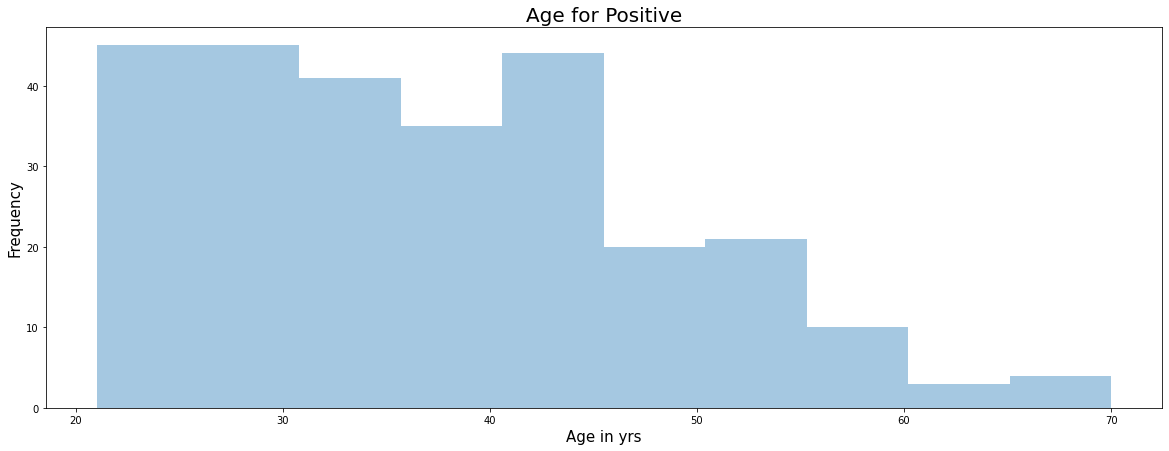

In [127]:

fig = plt.figure(figsize = (20,7))

sns.distplot(df["Age"][df["Outcome"]==1],kde=False)
plt.xticks()
plt.xlabel("Age in yrs",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Age for Positive",fontsize = 20)

In [128]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

df.shape

(768, 9)

In [129]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [130]:
#METHOD 1 COLUMN DELETION
#seperating dependent and independent columns


X = df.drop(["Pregnancies"],axis = 1)
y = df.iloc[:,-1]

In [131]:
#METHOD 2 Replace Mean
#replace zeros with mean value

#replace_zero = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness',  'Insulin','BMI','DiabetesPedigreeFunction' ,	'Age']
#for column in replace_zero:
 #df[column] = df[column].replace(0, np.NaN) #replace 0 with no data
 #mean = int(df[column].mean(skipna=True)) #find the mean of the column
 #df[column] = df[column].replace(np.NaN, mean) #replaces the NaN with mean

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (614, 8)
y_train size:  (614,) 

X_test size: (154, 8)
y_test size: (154,)


In [133]:
#standard scaling

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [134]:
print(sc)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [135]:
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [136]:
print(X_test)

[[-0.89295432  2.39507259  0.39763774 ...  1.52657475  2.78935129
  -0.93064283]
 [-0.56553774 -0.42589245  0.2898275  ...  0.31944116 -0.27698825
  -0.83598035]
 [ 0.08929543 -1.37643502 -0.35703388 ...  0.37136088 -0.31725331
  -0.64665539]
 ...
 [ 0.08929543  0.64730077  0.93668889 ...  1.66935399  0.4694641
  -0.93064283]
 [-0.23812115 -0.14992848  0.2898275  ... -0.62809381 -1.19689011
  -0.74131787]
 [-0.89295432 -0.42589245  0.18201727 ... -0.04399691  1.01459113
  -0.74131787]]


In [137]:
#  1  KNN

kn_classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p = 2)
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
kn_y_pred = kn_classifier.predict(X_test)

In [139]:
cm_kn = confusion_matrix(y_test, kn_y_pred)
print(cm_kn)

[[96 11]
 [17 30]]


In [140]:
print("Correct:",sum(kn_y_pred == y_test))
print("Incorrect : ",sum(kn_y_pred != y_test))
print("Accuracy:",sum(kn_y_pred ==y_test)/len(kn_y_pred))

Correct: 126
Incorrect :  28
Accuracy: 0.8181818181818182


In [141]:
#  2  Decision Tree classifer object


clf = DecisionTreeClassifier(criterion="entropy", max_depth=11)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [142]:
cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt)

[[83 24]
 [21 26]]


In [143]:
# Model Accuracy, how often is the classifier correct?
print("Correct:",sum(y_pred == y_test))
print("Incorrect : ",sum(y_pred != y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Correct: 109
Incorrect :  45
Accuracy: 0.7077922077922078


In [144]:
#  3  LR define the model


model=LogisticRegression()
model.fit(X_train,y_train)
lr_y_pred=model.predict(X_test)

In [145]:
cm_lr = confusion_matrix(y_test, lr_y_pred)
print(cm_lr)

[[94 13]
 [18 29]]


In [146]:
print("Correct:",sum(lr_y_pred == y_test))
print("Incorrect : ",sum(lr_y_pred != y_test))
print("Accuracy:",metrics.accuracy_score(y_test, lr_y_pred)) 

Correct: 123
Incorrect :  31
Accuracy: 0.7987012987012987


In [147]:
#  4  SVM


svc_classifier = SVC(kernel ="linear",random_state = 0)
svc_classifier.fit(X_train,y_train)

svc_y_pred = svc_classifier.predict(X_test)

In [148]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[96 11]
 [18 29]]


In [149]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(kn_y_pred))

Correct: 125
Incorrect :  29
Accuracy: 0.8116883116883117


In [150]:
#  5  naive bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

nb_y_pred =nb_classifier.predict(X_test)

In [151]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[87 16]
 [20 31]]


In [152]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred))

Correct: 118
Incorrect :  36
Accuracy: 0.7662337662337663


In [153]:
#  6  ANN

import keras
from keras.models import Sequential
from keras.layers import Dense

In [154]:
model = Sequential()

model.add(Dense(input_dim = 8, units = 16, activation='relu', kernel_initializer='uniform'))

In [155]:
model.add(Dense(units = 36, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=500, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.3960
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.6674
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.6481
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.6407
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.6383
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.6440
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.6491
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.6496
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.6657
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.6747
Epoch 11/50
2/2 [======================

In [156]:
model.evaluate(X_test,y_test) 

5/5 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7987


[0.4771439731121063, 0.798701286315918]